<a href="https://colab.research.google.com/github/elmervega/Artificial_network/blob/master/MNIST_Digits_Classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

# Data

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualize Examples

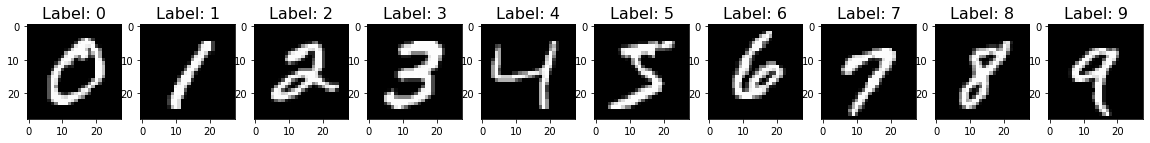

In [ ]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [ ]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Prepare Data

In [ ]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


# Create Model - Fully Connected Neural Network

In [ ]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Train

In [ ]:
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 4s 3ms/step - loss: 1.0760 - accuracy: 0.6767
Epoch 2/10
118/118 [==============================] - 0s 3ms/step - loss: 0.2576 - accuracy: 0.9254
Epoch 3/10
118/118 [==============================] - 0s 3ms/step - loss: 0.1774 - accuracy: 0.9476
Epoch 4/10
118/118 [==============================] - 0s 3ms/step - loss: 0.1404 - accuracy: 0.9591
Epoch 5/10
118/118 [==============================] - 0s 3ms/step - loss: 0.1137 - accuracy: 0.9669
Epoch 6/10
118/118 [==============================] - 0s 3ms/step - loss: 0.0957 - accuracy: 0.9715
Epoch 7/10
118/118 [==============================] - 0s 3ms/step - loss: 0.0811 - accuracy: 0.9758
Epoch 8/10
118/118 [==============================] - 0s 3ms/step - loss: 0.0693 - accuracy: 0.9794
Epoch 9/10
118/118 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9821
Epoch 10/10
118/118 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 0.9850

# Evaluate

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0704 - accuracy: 0.9769
Test Loss: 0.07038426399230957, Test Accuracy: 0.9768999814987183


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

[[1.1424026e-07 3.5584242e-06 8.7854205e-05 ... 9.9985158e-01
  4.1665422e-07 7.8688072e-06]
 [6.0960903e-09 6.9028774e-04 9.9930477e-01 ... 2.3878781e-09
  1.7172159e-06 2.5546367e-09]
 [2.2466206e-06 9.9870110e-01 3.9254114e-04 ... 3.8898244e-04
  3.0751157e-04 4.0192608e-06]
 ...
 [6.1731926e-09 1.4442132e-08 2.0972726e-09 ... 3.5955811e-06
  4.7408330e-06 6.9583339e-06]
 [1.9350320e-08 3.4311922e-09 1.0461147e-10 ... 1.2825818e-07
  5.0654540e-05 1.1946880e-08]
 [4.8439752e-08 4.1960764e-09 1.6973647e-07 ... 3.0365783e-11
  3.0698249e-07 1.4581400e-10]]
[7 2 1 ... 4 5 6]


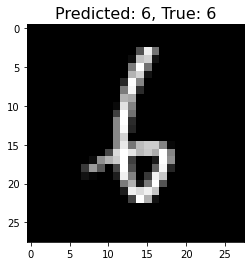

In [ ]:
# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

# Confusion Matrix

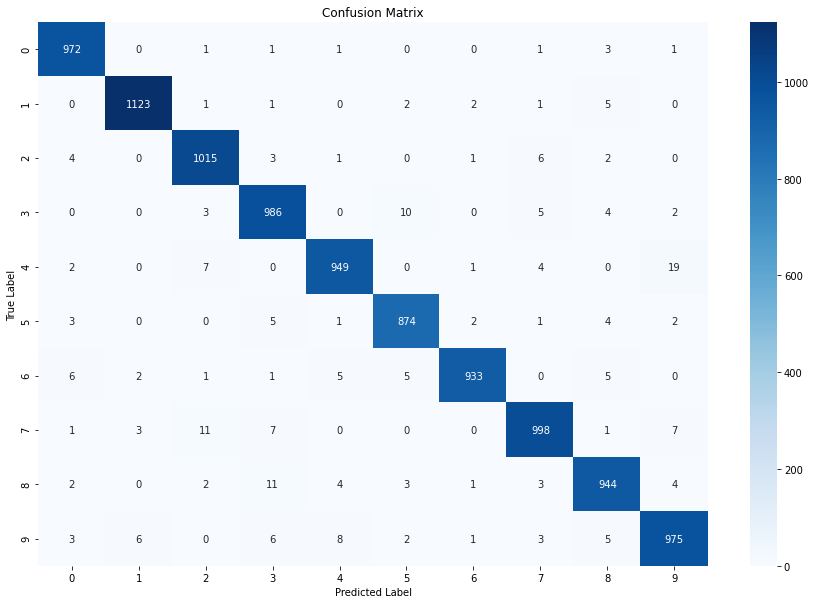

In [ ]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

# Investigate Some Errors

In [ ]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [ ]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

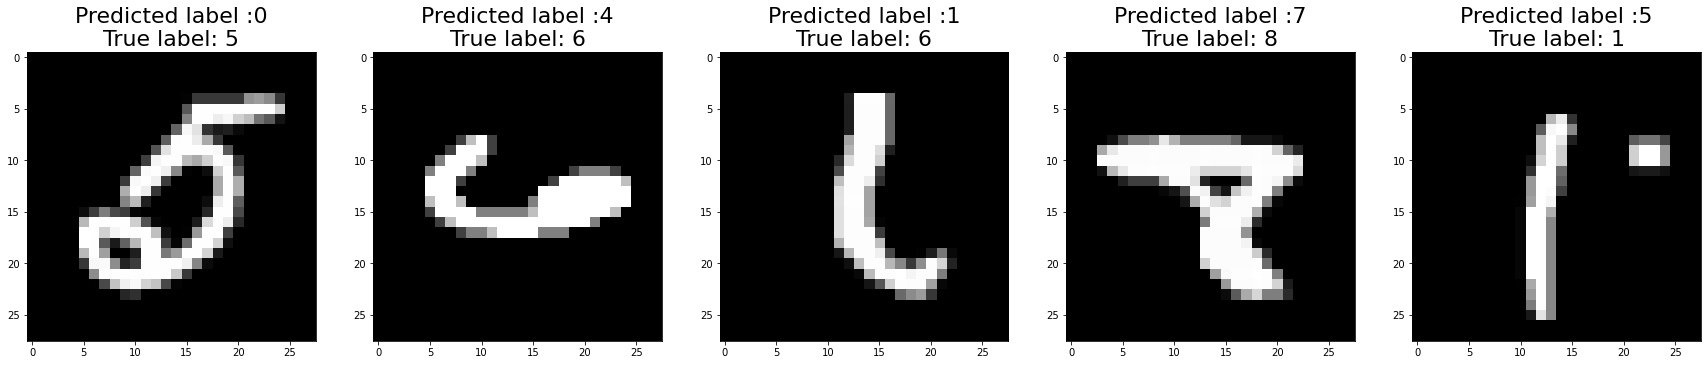

In [ ]:
# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)